# Solução da atividade computacional

## Problema 1. Determinação do vetor resultante.
Encontrar a magnitude e a direção do vetor resultante 𝑣⃗ dos vetores 𝑣⃗1, 𝑣⃗2 e 𝑣⃗3 , mostrados na Figura 1. O vetor $𝑣⃗1 = 𝑂𝐴⃗$ esta contindo no plano x-y, tem uma inclunação 𝑚 = 𝑏 𝑐 e magnitude 𝑣1. O vetor 𝑣⃗2 = 𝑂𝐵⃗ tem a magnitude 𝑣2 e sua projeção no eixo y é 𝑣2𝑦. Enquanto que, o vetor 𝑣⃗3 = 𝑂𝐶⃗ tem a magnitude 𝑣3 e faz um ângulo 𝜃 com o eixo x.

Para a aplicação computacional utilize: 𝑣1 = 1 𝑁, 𝑣1 = 1𝑁, 𝑣2𝑦 = 0.5 𝑁, 𝑣3 =1.5 𝑁, 𝑏 = 4 𝑚, 𝑐 = 3 𝑚 e 𝜃 = 30°

In [1]:
# importando as bibliotecas necessárias
using Plots
using LinearAlgebra
using Printf


In [2]:
# definindo os parâmetros necessários
v = [1., 1., 1.5] # magnitude dos vetores [N]
vy = [NaN, 0.5, NaN] # componente y dos vetores [N]
b = 4 # m
c = 3 # m
theta = 30; # 30°

In [3]:
alpha_x = zeros(3) # ângulo alfa em relação ao eixo -x
vx = zeros(3) # ângulo alfa em relação ao eixo -y
# definindo variáveis auxiliares
# para o vetor 1
m = b / c
alpha_x[1] = atand(m) # [rad]
@printf("alpha_1= %f °\n", alpha_x[1])
# para o vetor 2
beta = asind(vy[2] / v[2])
alpha_x[2] = 180. - beta # [rad]
@printf("alpha_2= %f °\n", alpha_x[2])
# para o vetor 3
alpha_x[3] = 180 + theta # [rad]
@printf("alpha_3= %f °", alpha_x[3])

alpha_1= 53.130102 °
alpha_2= 150.000000 °
alpha_3= 210.000000 °

In [4]:
# calcular os vetores
vx = v .* cosd.(alpha_x)
vy = v .* sind.(alpha_x)

@printf("componentes x:\n\t"); println(vx)
@printf("componentes y:\n\t"); println(vy)

componentes x:
	

[0.6, -0.8660254037844386, -1.299038105676658]
componentes y:
	[0.8, 0.5, -0.75]


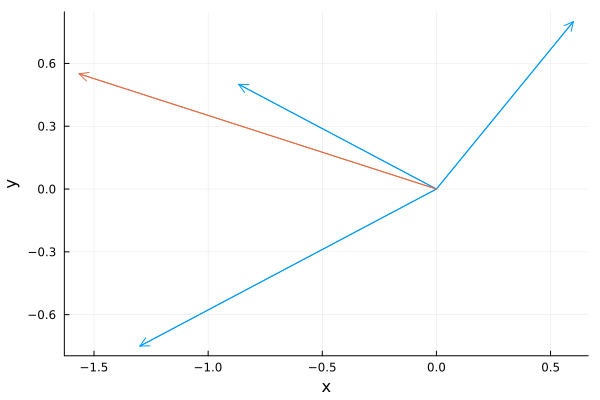

In [5]:
# plotando os vetores
rx = sum(vx)
ry = sum(vy)

# criando a figura (área de plotagem) e falando que é uma projeção no 3D
quiver(zeros(3),zeros(3),quiver=(vx, vy))
quiver!([0],[0],quiver=([rx], [ry]))
xlabel!("x")
ylabel!("y")

## Problema 2. Cosenos diretores
O ponto M está no plano x-y com $\vec{OM}=$ 50 𝑚. O ângulo entre $\vec{OM}=$ e o eixo x é 𝛼 = 45°. As coordenadas do ponto 𝐴 são x_A  = 20 𝑚, y_A = 10 𝑚. e z_A = 30 𝑚. Sabendo que 𝐹 = 500𝑘𝑁, encontre a forma vetorial e seus cosenos diretores 

In [6]:
# entrada
F = 500; # [kN]
OM = 50 # [m]
xA = 20; # [m]
yA = 10; # [m]
zA = 30; # [m]
α = 45; #[°]

In [7]:
# vetor lambdaAM
rₐ = [xA, yA, zA]
rₘ = [OM*cosd(α), OM*sind(α), 0.]
rₐₘ = rₘ - rₐ
m_rₐₘ = norm(rₐₘ)
λₐₘ = rₐₘ ./ m_rₐₘ
F_ = F * λₐₘ

@printf("forma vetorial de F:"); println(F_)

# angulos diretores
θx = acosd(F_[1] / F)
θy = acosd(F_[2] / F)
θz = acosd(F_[3] / F)
@printf("angulos diretores: %f°, %f°, %f°", θx,θy,θz)

forma vetorial de F:[182.04575060467596, 300.60109471092994, -355.66603231876195]


angulos diretores: 68.648317°, 53.043953°, 135.343399°

## Problema 4: Projeto de mínima força 

Duas forças atuam sobre a argola fincada sobre um estaca de madeira, conforme mostrado na Figura. Se F = 60 N, determine a intensidade da força resultante e o ângulo 𝜃 se a força resultante for direcionada verticalmente para cima. Após a análise, plotar o gráfico da força em função do ângulo 𝜃 para 0 ≤ 𝜃 ≤ 180°.


In [8]:
# Módulo da força resultante |R| em função de 𝜃
θ = 0:2:180 # variação de theta de [0,180°]

# aqui theta não precisa ser convertida em radianos pois ele já varia de 0 -> pi
R = 60*cosd(30) .+ 60*cosd(30)./tand.(θ);

# aqui theta não precisa ser convertida em radianos pois ele já varia de 0 -> pi
T = 60*sind(30)./sind.(θ);

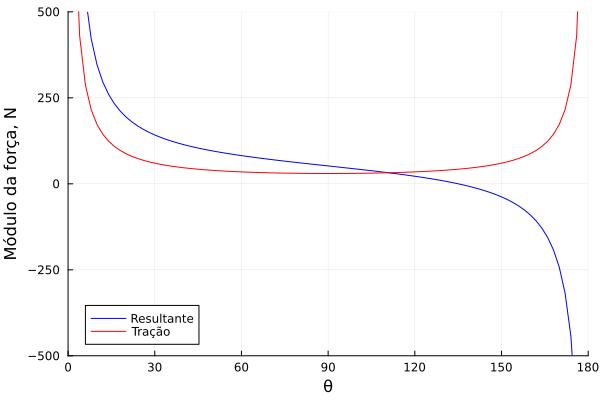

In [9]:
plot(θ, R, color=:blue, label="Resultante")
plot!(θ, T, color=:red, label="Tração")
xlims!(0,180)
ylims!(-500.0,500.0)
xlabel!("θ")
ylabel!("Módulo da força, N")

# Problema 5: Momento sobre um tubo 

As chaves flutuantes são usadas para prender as extremidades do tubo de perfuração P. Determine o torque (momento) 𝑀𝑝 que a força aplicada F = 667.5 N exerce sobre o tubo em torno do ponto P em função de 𝜃. Trace este momento 𝑀𝑝 em função de 𝜃 para 0 ≤ 𝜃 ≤ 90°.


In [10]:
F = 667.5; # [N]

# Módulo do momento resultante |Mp| em função de 𝜃
α = 0:2:90 # variação de theta de [0,180°]

Mp = F*1.1*cosd.(α) .+ F*0.15*sind.(α);


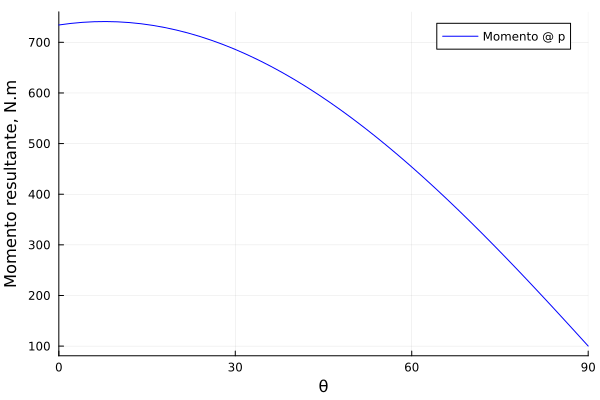

In [11]:
plot(α, Mp, color=:blue, label="Momento @ p")
xlims!(0,90)
xlabel!("θ")
ylabel!("Momento resultante, N.m")

## Problema 6: Estabilidade do equilíbrio 

Duas esferas de metal são conectadas por uma haste rígida e leve, conforme mostrado na Figura abaixo. Trace o ângulo θ (entre a haste e a horizontal) em função do peso W_1 (W_1≤10⋅W_2). Determine o peso W_1 para o qual (a) θ = -50°, (b) θ = 10°, (c) θ = 25°.
Você acha que as posições de equilíbrio das partes a, b e c são estáveis? (Isto é, se as esferas fossem levemente perturbadas, você acha que elas retornariam à posição de equilíbrio ou você acha que elas deslizariam para fora da superfície triangular?)


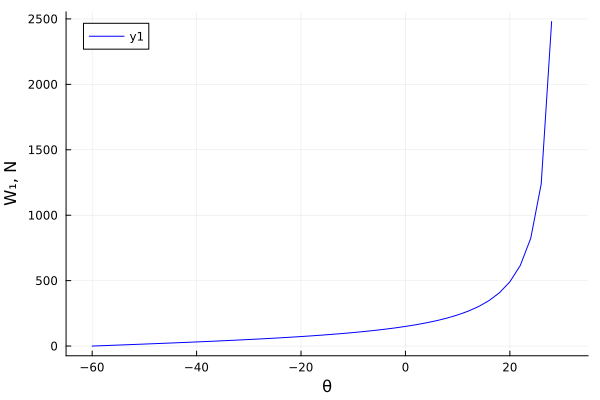

In [12]:
# variação de 𝜃
θ = -60:2:30 # variação de theta de [0,180°]
W₂ = 5 * 10; # peso de 2

W₁ = W₂ * cosd(30) ./ (tand.(30.0 .- θ) .* cosd(60));

# plotagem
plot(θ, W₁, color=:blue)
xlims!(-65.0,35)
xlabel!("θ")
ylabel!("W₁, N")

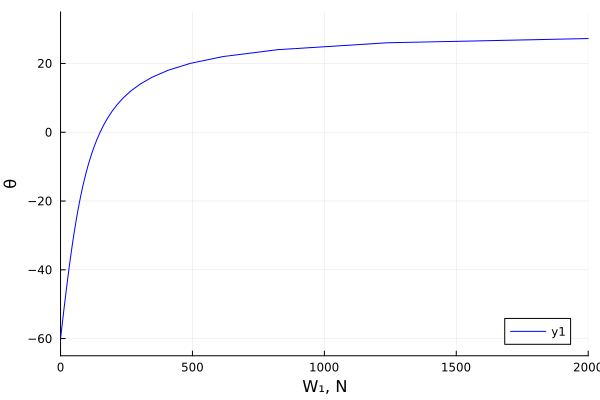

In [13]:
# plotagem 2
plot(W₁, θ, color=:blue)
ylims!(-65.0,35)
xlims!(0.0,2000)
ylabel!("θ")
xlabel!("W₁, N")

## Problema 7: Equilíbrio de uma partícula

A carga tem massa de 15 kg e é levantada pelo sistema de polias mostrado. Determine a força F na corda em função do ângulo θ. Plote a função da força F versus o ângulo θ para 0≤θ≤90°


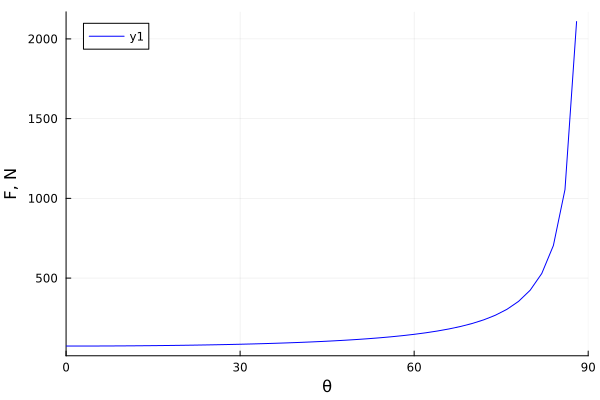

In [14]:
θ = 0:2:90

F = 73.6 .* secd.(θ);

# plotagem
plot(θ,F, color=:blue)
xlims!(.0,90)
xlabel!("θ")
ylabel!("F, N")